<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/Exercises_Day_13_15_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

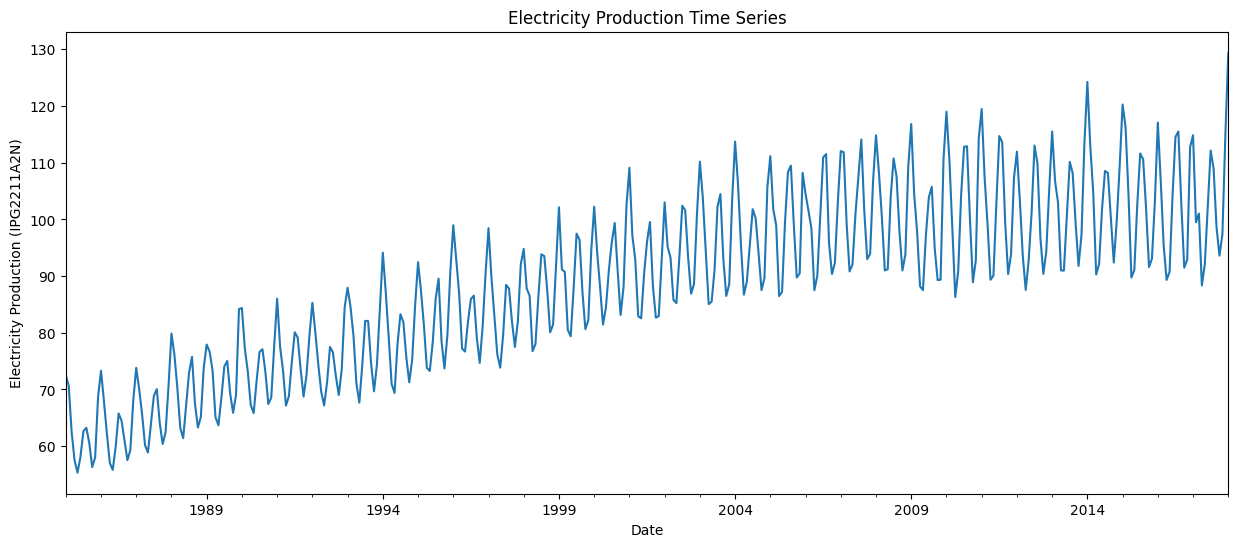

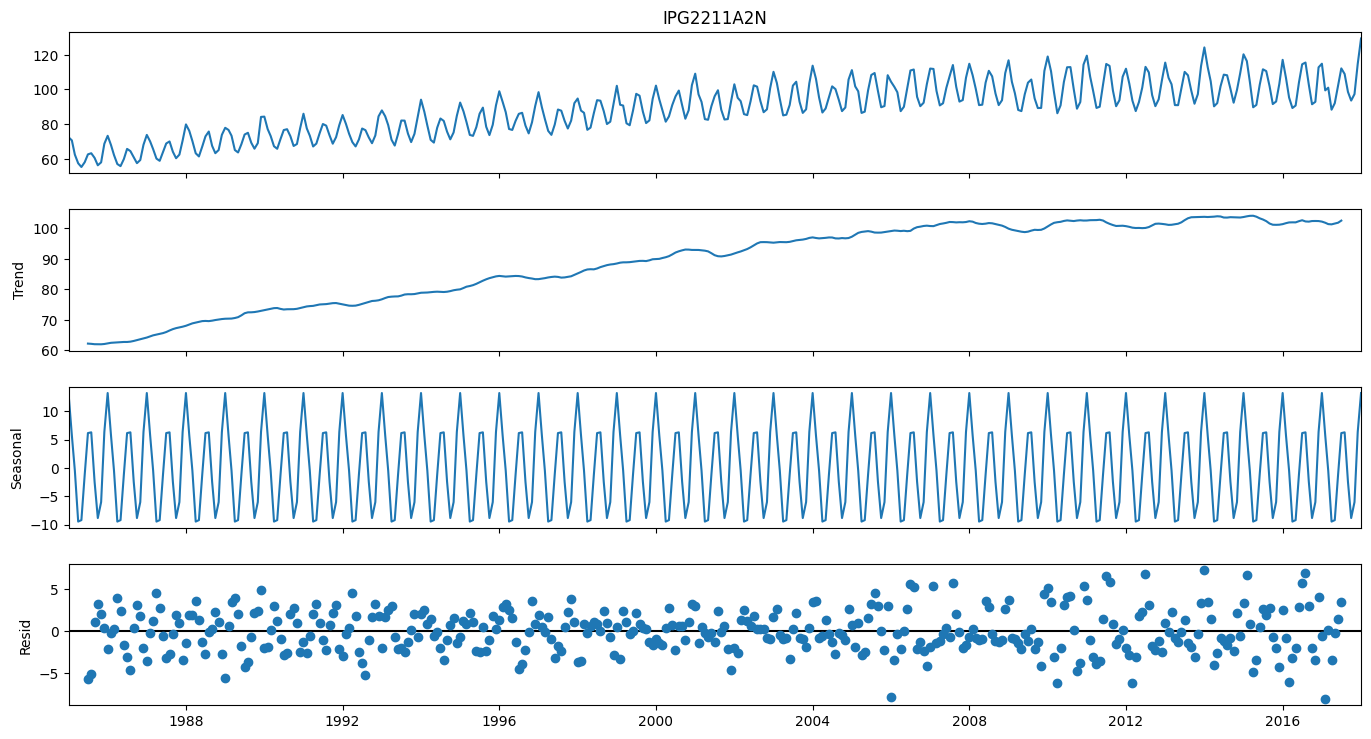

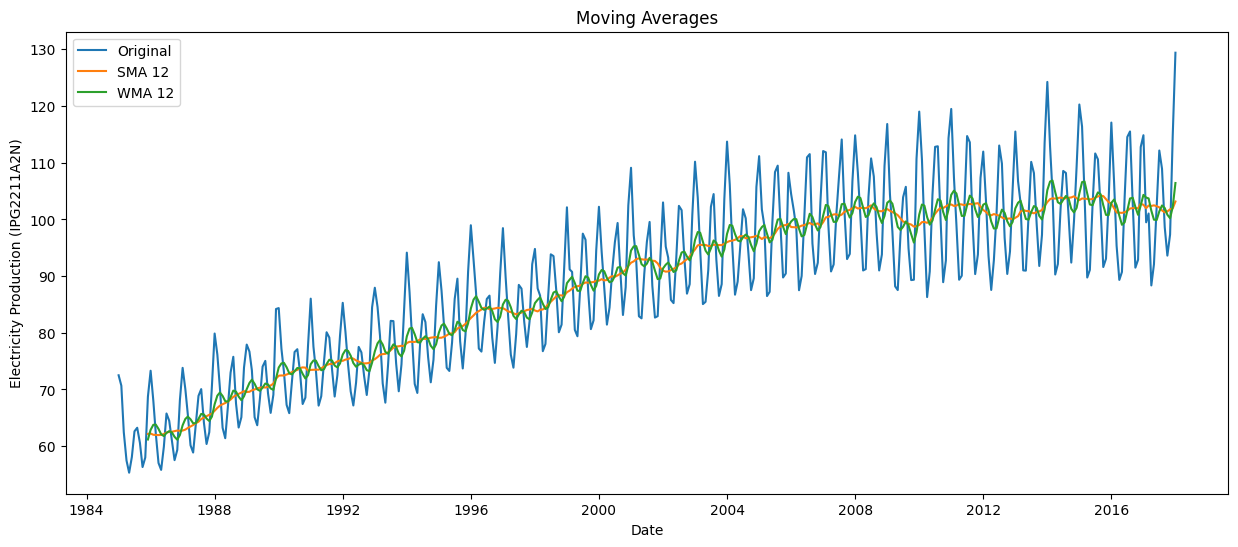

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


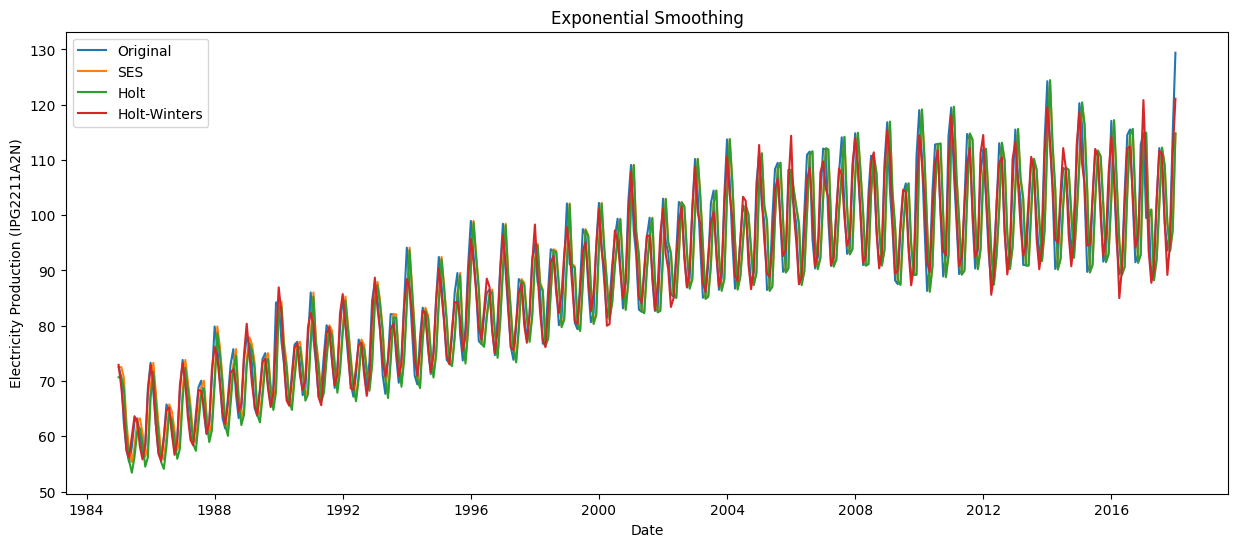

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


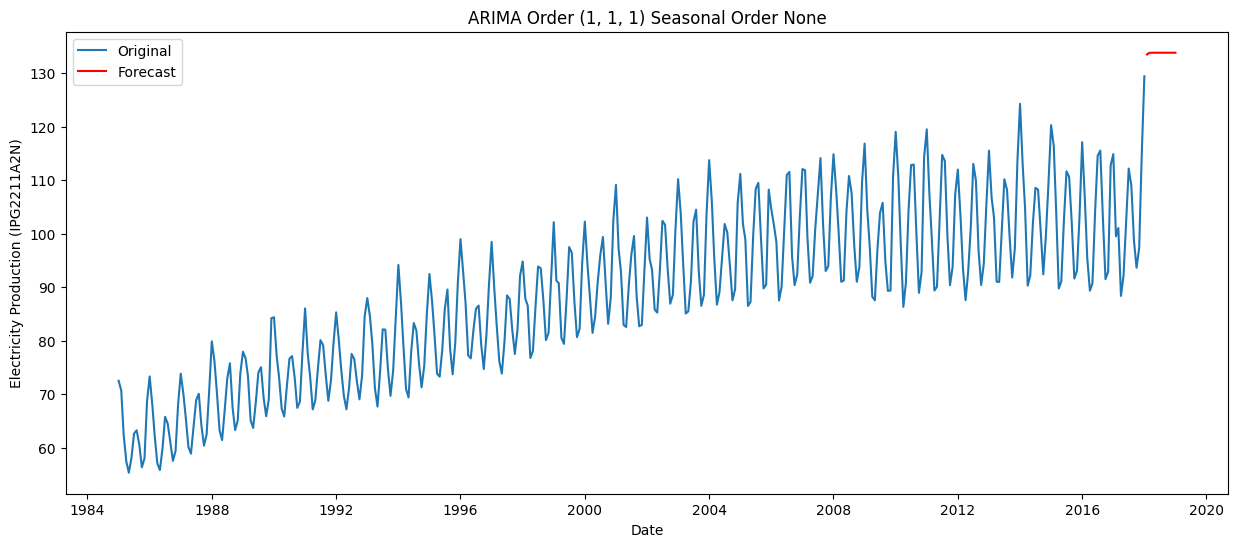

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


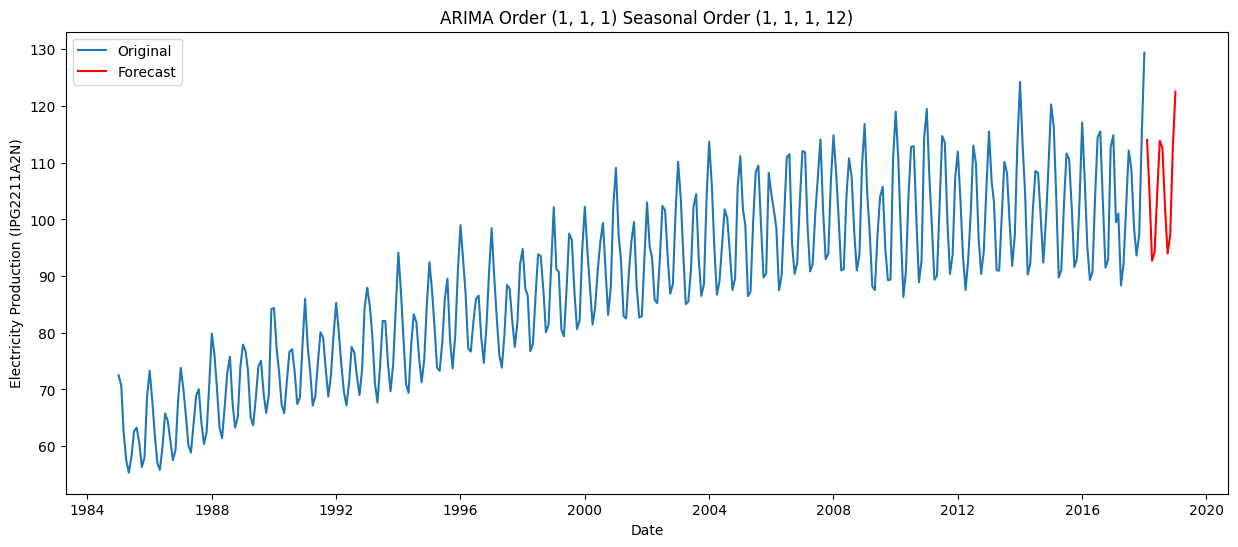

MAE: 30.61207572592902, RMSE: 32.51423215046695
MAE: 3.8019462926134877, RMSE: 5.294110083583613


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Load Data
path = '/content/drive/MyDrive/Datasets/Electric_Production.csv'
df = pd.read_csv(path, parse_dates=['DATE'], index_col='DATE')
time_series = df['IPG2211A2N']

# Plot the time series
plt.figure(figsize=(15, 6))  # Increased width
time_series.plot(title="Electricity Production Time Series")
plt.xlabel("Date")
plt.ylabel("Electricity Production (IPG2211A2N)")
plt.show()

# Decomposition
decompose = seasonal_decompose(time_series, model='additive', period=12)  # Adjust period based on seasonality
decompose.plot()
plt.gcf().set_size_inches(15, 8)  # Increased width for decomposition plots
plt.show()

# Moving Averages
def plot_moving_averages(series, window):
    sma = series.rolling(window=window).mean()
    weights = np.arange(1, window + 1)
    wma = series.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

    plt.figure(figsize=(15, 6))  # Increased width
    plt.plot(series, label='Original')
    plt.plot(sma, label=f'SMA {window}')
    plt.plot(wma, label=f'WMA {window}')
    plt.legend()
    plt.title('Moving Averages')
    plt.xlabel("Date")
    plt.ylabel("Electricity Production (IPG2211A2N)")
    plt.show()

plot_moving_averages(time_series, window=12)

# Exponential Smoothing
ses = ExponentialSmoothing(time_series, seasonal=None).fit()
holt = Holt(time_series).fit()
holt_winters = ExponentialSmoothing(time_series, seasonal='additive', seasonal_periods=12).fit()

plt.figure(figsize=(15, 6))  # Increased width
plt.plot(time_series, label='Original')
plt.plot(ses.fittedvalues, label='SES')
plt.plot(holt.fittedvalues, label='Holt')
plt.plot(holt_winters.fittedvalues, label='Holt-Winters')
plt.legend()
plt.title('Exponential Smoothing')
plt.xlabel("Date")
plt.ylabel("Electricity Production (IPG2211A2N)")
plt.show()

# ARIMA and SARIMA
def fit_and_plot_arima(series, order, seasonal_order=None):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=12).predicted_mean

    plt.figure(figsize=(15, 6))  # Increased width
    plt.plot(series, label='Original')
    plt.plot(forecast, label='Forecast', color='red')
    plt.legend()
    plt.title(f'ARIMA Order {order} Seasonal Order {seasonal_order}')
    plt.xlabel("Date")
    plt.ylabel("Electricity Production (IPG2211A2N)")
    plt.show()

    return results, forecast

arima_order = (1, 1, 1)
sarima_order = (1, 1, 1, 12)
arima_model, arima_forecast = fit_and_plot_arima(time_series, arima_order)
sarima_model, sarima_forecast = fit_and_plot_arima(time_series, arima_order, sarima_order)

# Evaluation
def evaluate_model(original, forecast):
    mae = mean_absolute_error(original, forecast)
    rmse = sqrt(mean_squared_error(original, forecast))
    print(f"MAE: {mae}, RMSE: {rmse}")

# Evaluate on the last 12 data points
actual = time_series[-12:]
evaluate_model(actual, arima_forecast)
evaluate_model(actual, sarima_forecast)


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Evaluate a model
def evaluate_forecast(model_name, original, forecast):
    mae = mean_absolute_error(original, forecast)
    rmse = sqrt(mean_squared_error(original, forecast))
    return {"model": model_name, "MAE": mae, "RMSE": rmse}

# Forecast with SES, Holt, and Holt-Winters
forecast_steps = 12
ses_forecast = ses.forecast(steps=forecast_steps)
holt_forecast = holt.forecast(steps=forecast_steps)
holt_winters_forecast = holt_winters.forecast(steps=forecast_steps)

# ARIMA and SARIMA forecasts (already obtained earlier)
arima_forecast = arima_forecast[:forecast_steps]
sarima_forecast = sarima_forecast[:forecast_steps]

# Actual values for the test period
actual = time_series[-forecast_steps:]

# Evaluate each model
results = []
results.append(evaluate_forecast("SES", actual, ses_forecast))
results.append(evaluate_forecast("Holt", actual, holt_forecast))
results.append(evaluate_forecast("Holt-Winters", actual, holt_winters_forecast))
results.append(evaluate_forecast("ARIMA", actual, arima_forecast))
results.append(evaluate_forecast("SARIMA", actual, sarima_forecast))

# Display results
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

# Summarize the best-performing model
best_model = results_df.iloc[0]
print("\nBest Performing Model:")
print(f"Model: {best_model['model']}")
print(f"MAE: {best_model['MAE']:.2f}")
print(f"RMSE: {best_model['RMSE']:.2f}")
print("\nThe best-performing model has the lowest RMSE and MAE values.")


          model        MAE       RMSE
4        SARIMA   3.801946   5.294110
2  Holt-Winters   8.342867   8.913741
0           SES  26.247100  28.446228
1          Holt  27.836175  29.756927
3         ARIMA  30.612076  32.514232

Best Performing Model:
Model: SARIMA
MAE: 3.80
RMSE: 5.29

The best-performing model has the lowest RMSE and MAE values.
